#### Importing libraries

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Loading data

 The code below loads a modified version of the iris dataset which has two classes.
 
 A 1 is a virginica flower and a 0 is versicolor flower. 

In [31]:
df_flowers = pd.read_csv('virginica_versicolor_Iris.csv')

#### Checking dataset shape

In [32]:
print ('Data Shape: ', df_flowers.shape)

Data Shape:  (100, 5)


#### The describe() method returns description of the data in the DataFrame.

In [33]:
df_flowers.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


#### Defining the dependent (target, label) and independent (feature) variables

In [34]:
df_feature = df_flowers[['petal length (cm)']]

# Gives a new shape to an array without changing its data.
# df_feature = df_feature.values.reshape(-1, 1)

df_label = df_flowers['target']

df_feature


,petal length (cm)
0,4.7
1,4.5
2,4.9
3,4.0
4,4.6
...,...
95,5.2
96,5.0
97,5.2
98,5.4


#### Splitting data into training and test sets

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(df_flowers[['petal length (cm)']], df_flowers['target'], random_state=0)

x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label, random_state=0)

#### Checking df_feature

In [36]:
df_feature.head()

,petal length (cm)
0,4.7
1,4.5
2,4.9
3,4.0
4,4.6


#### Checking df_label

In [37]:
# The labels were written out as a pandas series, which does not carry a column name

df_label

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

#### Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [38]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Create logistic regression object

In [39]:
lr = LogisticRegression()

#### Training data by using train dataset

In [40]:
lr.fit(x_train, y_train)

LogisticRegression()

#### One observation's petal length after standardization

In [54]:
# x_test[0].reshape(1,-1)

x_test[0]

array([-0.12093628])

#### Prediction and probability

In [76]:
# print('prediction', lr.predict(x_test[0].reshape(1,-1))[0])
# print('probability', lr.predict_proba(x_test[0].reshape(1,-1))[0])

for i in range (len(x_test)):
    print('prediction', i + 1,   lr.predict(x_test[i].reshape(1,-1))[0], '|| probability ', i + 1, lr.predict_proba(x_test[i].reshape(1,-1))[0])
# print('probability', lr.predict_proba(x_test[0].reshape(1,-1))[0])


prediction 1 0 || probability  1 [0.52720087 0.47279913]
prediction 2 1 || probability  2 [0.04934247 0.95065753]
prediction 3 1 || probability  3 [0.43180294 0.56819706]
prediction 4 1 || probability  4 [0.00112094 0.99887906]
prediction 5 1 || probability  5 [0.01107412 0.98892588]
prediction 6 1 || probability  6 [0.01616518 0.98383482]
prediction 7 0 || probability  7 [0.77887818 0.22112182]
prediction 8 1 || probability  8 [0.43180294 0.56819706]
prediction 9 1 || probability  9 [0.02354101 0.97645899]
prediction 10 1 || probability  10 [0.19392132 0.80607868]
prediction 11 1 || probability  11 [0.04934247 0.95065753]
prediction 12 1 || probability  12 [0.2608956 0.7391044]
prediction 13 1 || probability  13 [0.04934247 0.95065753]
prediction 14 0 || probability  14 [0.62065304 0.37934696]
prediction 15 0 || probability  15 [0.99715703 0.00284297]
prediction 16 0 || probability  16 [0.98097906 0.01902094]
prediction 17 1 || probability  17 [0.43180294 0.56819706]
prediction 18 0 |

In [43]:
df_combined = pd.DataFrame()
df_combined.loc[:, 'petal length (cm)'] = x_test.reshape(-1)
df_combined.loc[:, 'target'] = y_test.values
df_combined['logistic_preds'] = pd.DataFrame(lr.predict_proba(x_test))[1]

In [44]:
df_combined.head()

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926


#### Plotting logistic regression

In [45]:
# fig, ax = plt.subplots()
# is more concise than this:

# fig = plt.figure()
# ax = fig.add_subplot(111)

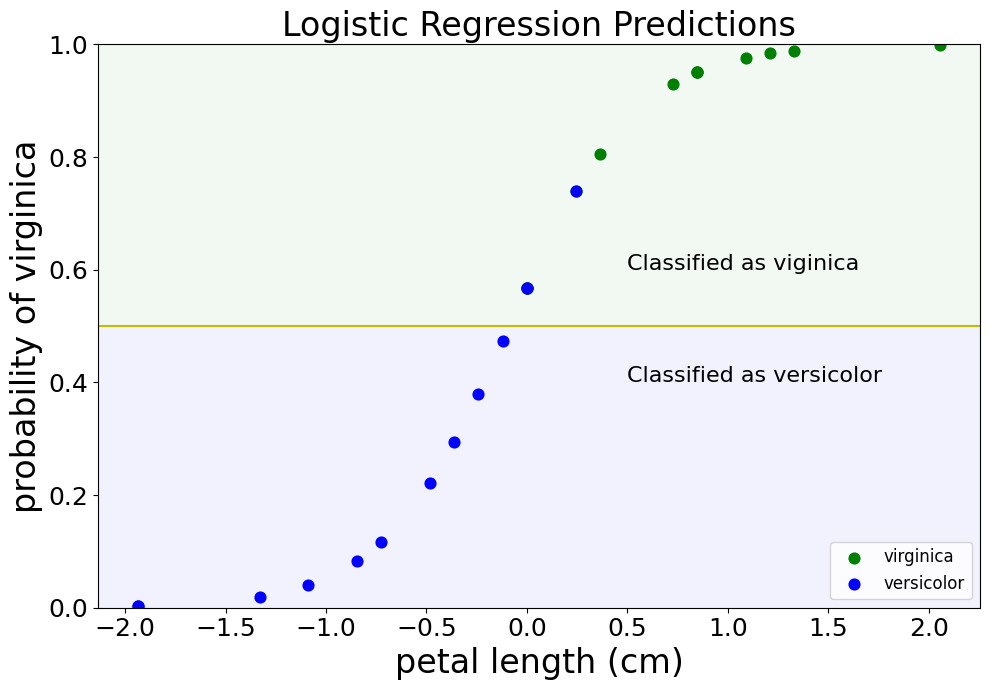

In [46]:
# Create a figure and a set of subplots.
# This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginica_filter = df_combined['target'] == 1
versicolor_filter = df_combined['target'] == 0

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[virginica_filter, 'petal length (cm)'].values,
            df_combined.loc[virginica_filter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[versicolor_filter, 'petal length (cm)'].values,
            df_combined.loc[versicolor_filter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

# Add a horizontal line across the Axes.
ax.axhline(y = .5, c = 'y')

# Add a horizontal span (rectangle) across the Axes.
ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')

# Add text to the Axes.
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

# Set the y-axis view limits.
ax.set_ylim(0,1)

# Place a legend on the Axes.
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)

# Change the appearance of ticks, tick labels, and gridlines.
ax.tick_params(labelsize = 18)

# Set the label for the x-axis.
ax.set_xlabel('petal length (cm)', fontsize = 24)

# Set the label for the y-axis.
ax.set_ylabel('probability of virginica', fontsize = 24)

# Set a title for the Axes.
ax.set_title('Logistic Regression Predictions', fontsize = 24)

# Adjust the padding between and around subplots.
fig.tight_layout()

#### Checking score

In [47]:
score = lr.score(x_test, y_test)
print(score)

0.88


#### Heatmap

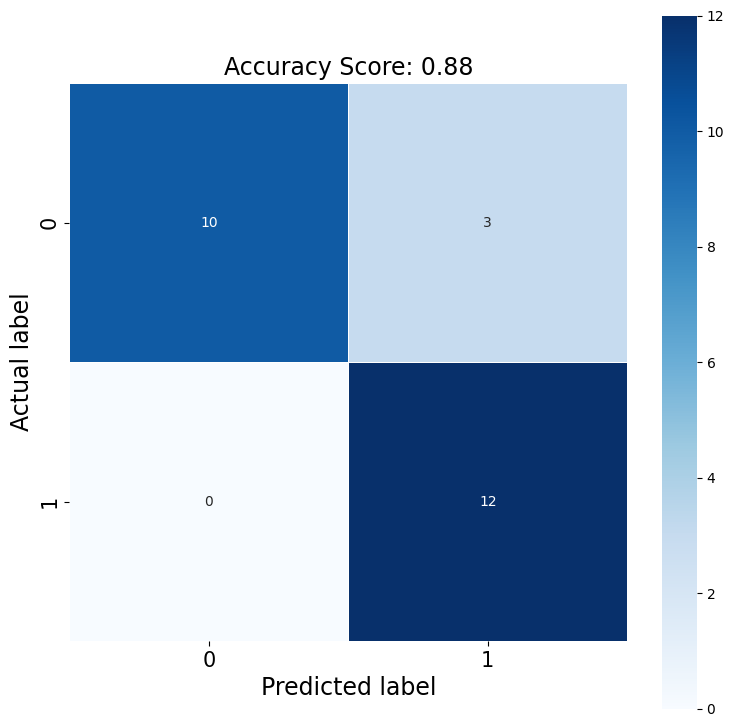

In [48]:
# Compute confusion matrix to evaluate the accuracy of a classification.
cm = metrics.confusion_matrix(y_test, lr.predict(x_test))

# Create a new figure, or activate an existing figure.
plt.figure(figsize=(9,9))

# Plot rectangular data as a color-encoded matrix.
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)